# Introduction to Matplotlib
---

**Objective:**

In this exercise, you will be covering basics of a  very useful library in Python called Matplotlib.
Matplotlib can be used for creating plots and charts. The library is generally used as follows:

    -Call a plotting function with some data (e.g. plot()).
    -Call many functions to setup the properties of the plot (e.g. labels and colors).
    -Make the plot visible (e.g. show()).

Source found [here](https://machinelearningmastery.com/crash-course-python-machine-learning-developers/).

In [ ]:
#Import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line Plot

The example below creates a simple line plot from one-dimensional data.

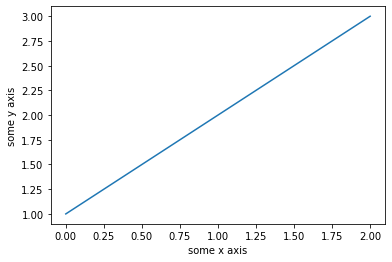

In [ ]:
#basic line plot
%matplotlib inline

#Create dummy data array
myarray = np.array([1, 2, 3])

#Plot line & label axis
plt.plot(myarray)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()

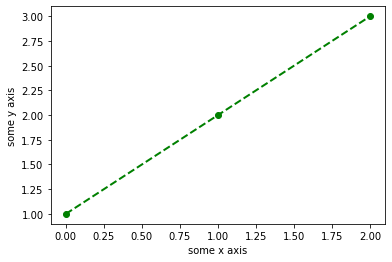

In [ ]:
#Change style of the previous plot (i.e Dashed Line + show data points)
plt.plot(myarray, 'go--', label='line 1', linewidth=2) #colour = 'green', marker = 'o', linestyle = 'dashed'
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()

## Scatter Plot

Below is a simple example of creating a scatter plot from two-dimensional data.

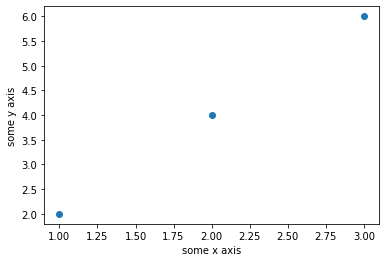

In [ ]:
# basic scatter plot

#Create dummy X & Y data
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])

#Plot X & Y
plt.scatter(x,y)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()

## Import our data

In [ ]:
Path_to_data = '/data/'

In [ ]:
#Read data from csv file
df = pd.read_csv(Path_to_data + 'admission_dataset.csv')

#Display data
df

## Histogram

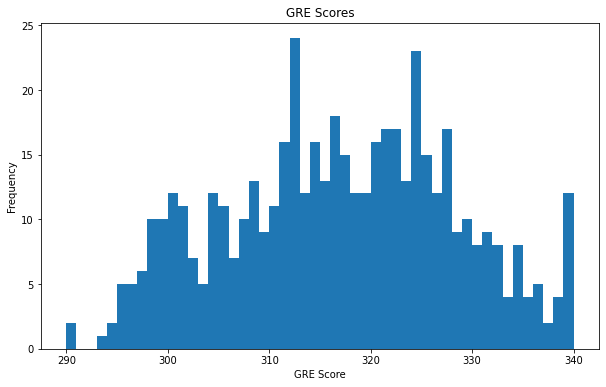

In [ ]:
#Histogram plot using Pandas Visualization

#Plot "GRE Score"s as a histogram with 50 bars with a figure size of (10,6) + label axis
df["GRE Score"].plot(kind='hist', bins=50, figsize=(10,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

## Scatter Plot

In [ ]:
#Scatter plot using Matplotlib

#Create a scatter plot to look at the relationship between a student's University Rating and his/her CGPA
plt.scatter(df['University Rating'], df['CGPA'])
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

In [ ]:
#Scatter plot using Pandas Dataframe

#Create a Scatter plot of GRE Scores against CGPA
df.plot(kind='scatter', x='GRE Score', y='CGPA')
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

# Using the Iris Dataset
## Customizable Plots


Import the relevant libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import markers
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline

Import the Iris Dataset

In [ ]:
iris = datasets.load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df.head())

### Implement Customizable markers in a plot

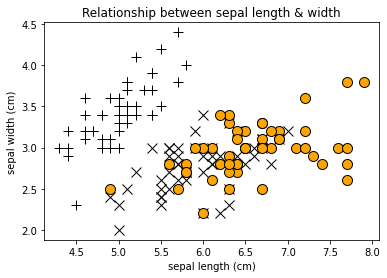

In [ ]:
# Label axis + title of graph of sepal length (cm) vs sepal width (cm)
plt.ylabel('sepal width (cm)')
plt.title('Relationship between sepal length & width')

# Give each label a marker through a dictionary
mapping = {'virginica' : 'o', 'versicolor': 'x', 'setosa': '+'}

# Map the values of the dictionary to the column 'species'
s=df['species'].map({'virginica' : 'o', 'versicolor': 'x', 'setosa': '+'})

# Make a loop to add markers one by one
for i in range(len(df['sepal length (cm)'])):
 plt.plot(df['sepal length (cm)'][i], df['sepal width (cm)'][i],marker=s[i],markerfacecolor='orange', markersize=10, markeredgecolor="black",markeredgewidth=1)
 #plt.text(df['sepal length (cm)'][i]+0.2, df['sepal width (cm)'][i]+0.1,df.species[i], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

### Implement points of interest on plots

Text(6, 3.8, 'This point is interesting!')

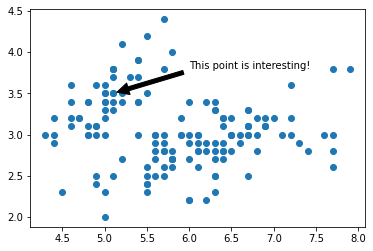

In [ ]:
#Custmoization adding annotation to scatter plot comparing sepal length (cm) vs sepal width (cm)

#(Scatter plot using .plot())
plt.plot( 'sepal length (cm)', 'sepal width (cm)', data=df, linestyle='none', marker='o')

#(Scatter plot using .scatter())
#plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
 
# Annotate with text + Arrow
plt.annotate(
    
# Label and coordinate (xy -> end point for arrow, xytext -> start point for arrow + start point for text)
'This point is interesting!', xy=(5.1, 3.5), xytext=(6,3.8),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)

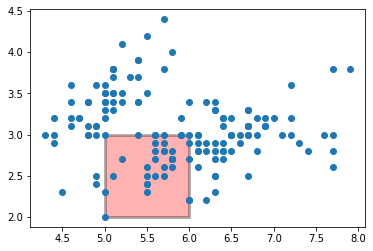

In [ ]:
#Customization adding shapes to show region of intersect 

# Initialize figure
fig1 = plt.figure()

#Add a subplot & Plot sepal length (cm) vs sepal width (cm) using a scatter plot
ax1 = fig1.add_subplot`(1,1,1)
ax1.plot( 'sepal length (cm)', 'sepal width (cm)', data=df, linestyle='none', marker='o')
 
# Add rectangle (hint: Use add_patch())
ax1.add_patch(
patches.Rectangle( # u can use patches.Circle OR patches.Ellipse
(5, 2), # (x,y)
1, # width
1, # height
# You can add rotation as well with 'angle'
alpha=0.3, facecolor="red", edgecolor="black", linewidth=3, linestyle='solid'
))

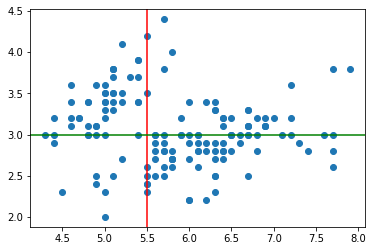

In [ ]:
#Customize by adding line segments

#Plot sepal length (cm) vs sepal width (cm) using a scatter plot
plt.plot( 'sepal length (cm)', 'sepal width (cm)', data=df, linestyle='none', marker='o')

# Annotate using line segments (hint: .axvline(), .axhline())
plt.axvline(5.5, color='r')
plt.axhline(3, color='green')


<font size="5"> 2D Density plot </font>
- 2D density plot or  2D histogram is an extension of the well known histogram.
- It shows the distribution of values in a data set across the range of two quantitative variables.
- It is really useful to avoid over plotting in a scatterplot.
- If you have too many dots, the 2D density plot counts the number of observations within a particular area of the 2D space.

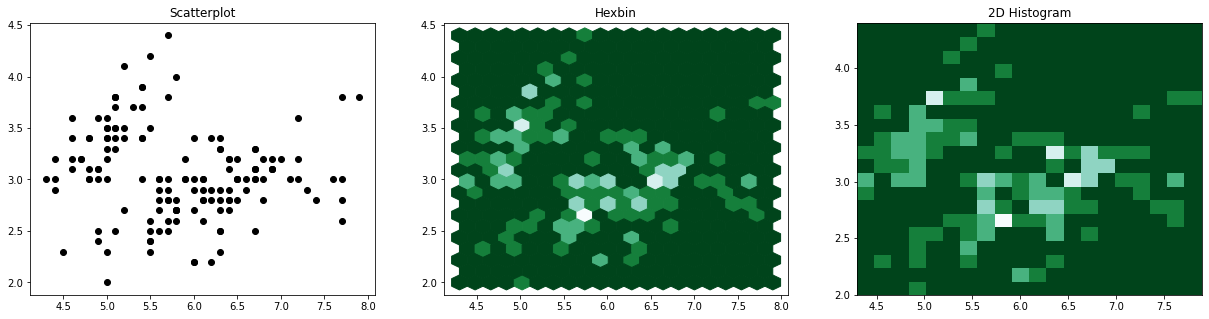

In [ ]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(21, 5))
 
#Start with a Scatterplot (sepal length (cm) vs sepal width (cm))
axes[0].set_title('Scatterplot')
axes[0].plot(df['sepal length (cm)'], df['sepal width (cm)'], 'ko')

 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(df['sepal length (cm)'], df['sepal width (cm)'], gridsize=nbins, cmap=plt.cm.BuGn_r)


# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(df['sepal length (cm)'], df['sepal width (cm)'], bins=nbins, cmap=plt.cm.BuGn_r)
 

fig.show()

<font size="5"> Box plots </font>
- A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
- It can tell you about your outliers and what their values are.
- It can tell  if and how your data is skewed.

Basic Box plot - Sepal length

Text(0.5, 1.0, 'Sepal Length Box plot')

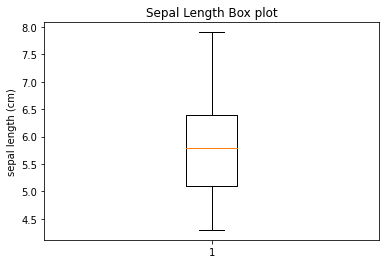

In [ ]:
#Create a box plot using Sepal Length data

plt.boxplot(df['sepal length (cm)'])
plt.ylabel('sepal length (cm)')
plt.title('Sepal Length Box plot')

***Insights:***

sepal length:
1. has no outliners
2. negatively skewed: median closest to the max
3. no symmetric: whiskers are no equals


Basic Box plot - Sepal Width

Text(0.5, 1.0, 'Sepal width Box plot')

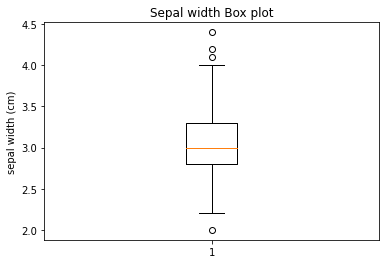

In [ ]:
#Create a box plot using Sepal Width data

plt.boxplot(df['sepal width (cm)'])
plt.ylabel('sepal width (cm)')
plt.title('Sepal width Box plot')

***Insights:***

sepal width:
1. has outliners
2. postively skewed: median closest to the min
3. no symmetric: whiskers are no equals

Customizable Box Plots

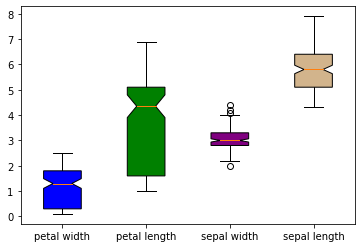

In [ ]:
#Change the color of boxplots

#Create a box plot containing all 4 features with labels, colors, and a Notch
box=plt.boxplot([df['petal width (cm)'],df['petal length (cm)'],df['sepal width (cm)'],df['sepal length (cm)']], notch=True,patch_artist=True,labels=['petal width', 'petal length','sepal width','sepal length'])

#Define colors for each boxplot in a list
colors = ['blue', 'green', 'purple', 'tan']

#loop over each boxplot and apply colors from the color array
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

## 3D Scatter Plot

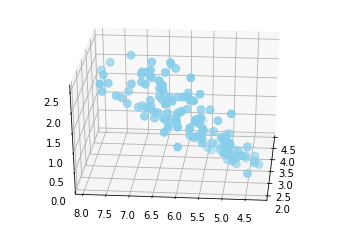

In [ ]:
#Create a 3D Scatter plot with 3 features: sepal width (cm), sepal length (cm), petal width (cm)

#Initiate a figure & add a subplot with a tag 3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

#Create a 3D scattor plot
ax.scatter(df['sepal width (cm)'], df['sepal length (cm)'], df['petal width (cm)'], c='skyblue', s=60)

#Set the view angle
ax.view_init(30, 185)
plt.show()